# Importing Library

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

# Loading the Dataset

In [3]:
df = pd.read_csv("Datasets/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# info()
info() is used for 3 things :-
1. Total Number of Rows
2. Each Columns Data Type
3. How many Null Values are Present

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# value_counts()
value_counts() is used to check 2 Things:-
1. Particular Column has how many categories
2. Total Number of each categories

In [5]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

# describe()
describe() method show you the summary of the Numerical Attributes/Columns.
In this Null Values are Ignored
1. Standard Deviation (std) - 
* Imagine the mean is the "center" or normal value.
* Standard deviation tells you how far, on average, the values are from that center.
2. Percentile - A percentile tells you how much of the data is below a certain point. It divides the dataset into 100 equal parts. For example:

* The 25th percentile (also called the first quartile) means 25% of the data points are smaller than that value.
* The 50th percentile (also known as the median) is the point where 50% of the data is below.
* The 75th percentile (or third quartile) means 75% of the data points are smaller than that value.

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Histogram
A histogram is a type of bar chart that shows the distribution of numerical data. It divides the data into "bins" or intervals and counts how many data points fall within each bin. Each bin is represented by a bar, and the height of the bar shows the frequency of data points in that range.

In simple terms, a histogram helps you understand how the data is spread—whether values are clustered together, spread out, or if there are any unusual patterns (like outliers).

* Symmetric: If both sides of the histogram look similar, the data is evenly distributed around the center.
    * Skewed Left or Right: If one side is longer, the data is skewed.
        * Right Skew: Many smaller values, fewer larger ones (tail on the right).
        * Left Skew: Many larger values, fewer smaller ones (tail on the left).

# Capped Columns
* As you can see few columns like (housing_median_age, median_house_value, median_income) are Capped. 
* In the context of data analysis and machine learning, "capping a column" means limiting the values in a column to lie within a certain range. If a value in the column exceeds the defined upper or lower limits (also called caps), it is replaced or restricted by these boundary values.
* And also you can see in housing_median_age and median_house_value the last value is suddenly extreme high in frequency.

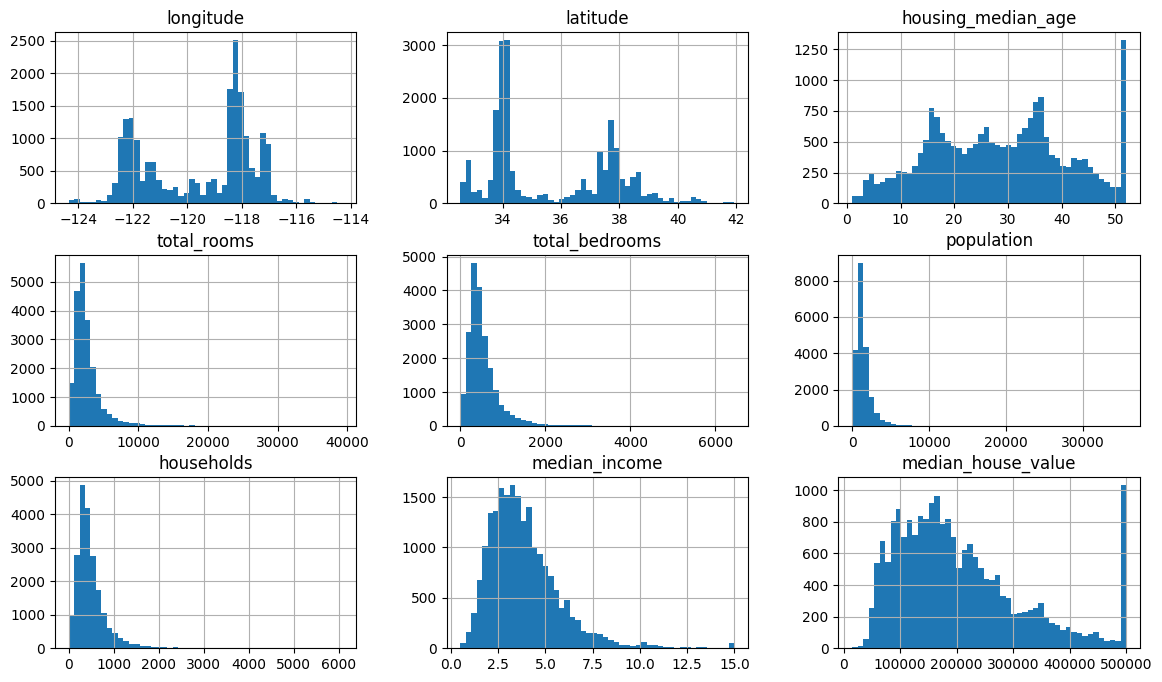

In [7]:
df.hist(bins=50, figsize=(14, 8))
plt.show()

# Test Data
### Stratified Sampling
* Stratified sampling is a statistical technique used to divide a population or dataset into distinct subgroups, called strata, based on specific characteristics (e.g., gender, age, class labels).
* It ensures that class distribution remains consistent across the original, training, and test datasets, preventing class imbalance issues.
* For imbalanced datasets and small datasets where maintaining class proportions is essential.
* Categorization is Essential: Since stratified sampling works with categories, you need to bin numerical data.
* Use binning or discretization techniques to divide the numerical feature into intervals (e.g., age groups: 0–18, 19–30, etc.).
* The newly created categories will act as the basis for stratified sampling.

In [12]:
# Converting the Numerical to Category Data using Bins
df['income_cat'] = pd.cut(df['median_income'], 
                          bins=[0. , 1.5, 3.0, 4.5, 6.0, np.inf],    # np.inf -> represent positive infinite values
                          labels=[1, 2, 3, 4, 5])

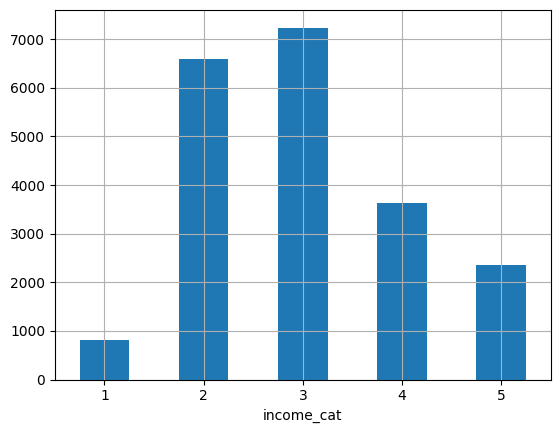

In [13]:
df['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid = True)
plt.show()

In [14]:
# Splitting Data based on the Income Category
start_train_set, strat_test_set = train_test_split(df, test_size=0.2, stratify=df['income_cat'], random_state=42)

In [18]:
strat_test_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [19]:
# Remove the Income Cat because now it doesn't have any work
for set_ in (start_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [20]:
strat_test_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

# Visualization of the Data

In [21]:
df = start_train_set.copy()

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\ehtes\AppData\Local\Temp\ipykernel_18000\761852138.py:2: SyntaxWarning: invalid escape sequence '\C'
  img = np.asarray(Image.open('Datasets\California Political Map.jpg'))


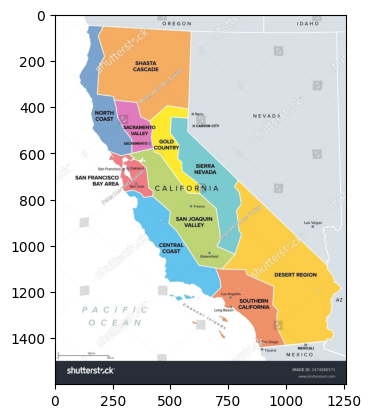

In [23]:
# Loading the California Polticial Map
img = np.asarray(Image.open('Datasets/California Political Map.jpg'))
plt.imshow(img)

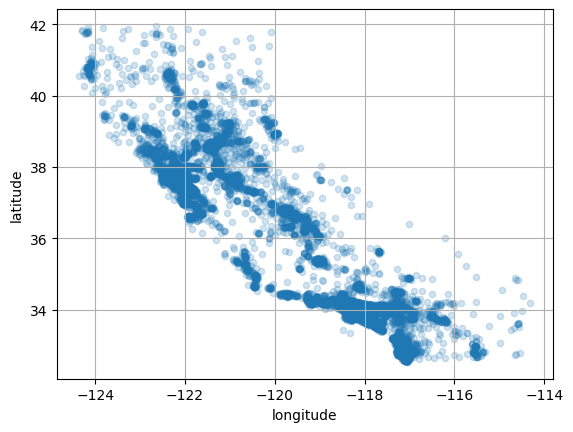

In [24]:
# Plotting the Scatter Plot of the Latitude and Longitude Data
df.plot(kind='scatter', x="longitude", y="latitude", alpha = 0.2, grid = True)
plt.show()

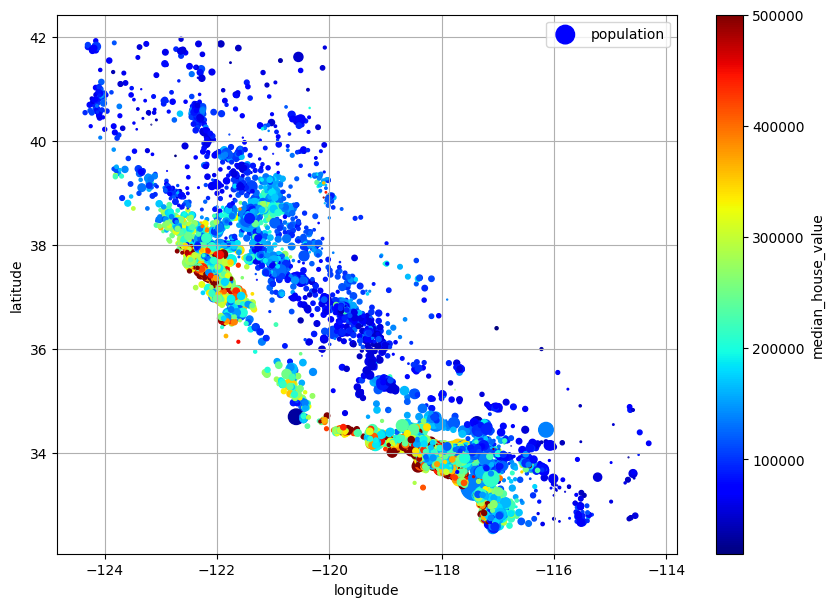

In [25]:
# Visualization of Housing Price in the area
# Red - Expensive, Blue - Cheap
df.plot(kind='scatter', x="longitude", y="latitude", grid = True, 
        s = df['population']/100, label = 'population', 
        c = 'median_house_value', cmap = 'jet', colorbar=True,
        legend = True, sharex=False, figsize=(10, 7))
plt.show()